Analysis

Observed Trend 1: Wind speed is pretty even across all latitudes

Observed Trend 2:Humidity is closly clustered around 40 -60 degrees latitude

Observed Trend 3:Temperature decreases as we go North

In [1]:
!pip install citipy

In [2]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/listofcities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

import importlib.machinery
api_key = importlib.machinery.SourceFileLoader('x', 'api_keys.py').load_module('x').api_keys

In [3]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [33]:
weather_pd = pd.DataFrame(cities, columns=['City'])
weather_pd

weather_pd['Cloudiness'] = ""
weather_pd['Country'] = ""
weather_pd['Date'] = ""
weather_pd['Humidity'] = ""
weather_pd['Lat'] = ""
weather_pd['Lng'] = ""
weather_pd['Max Temp'] = ""
weather_pd['Wind Speed'] = ""
weather_pd.head()

url = "http://api.openweathermap.org/data/2.5/weather?"

print("  Beginning Data Retrevial")

for index, row in weather_pd.iterrows():
    city = row['City']

    # Build query URL
    query_url = url + "appid=" + api_key + "&q=" + city +"&units=imperial"

    weather_response = requests.get(query_url)
    weather_response = weather_response.json()
    try:
        print(f"Processing city {index} of {city}")
        weather_pd.loc[index, "Lat"] = weather_response["coord"]["lat"]
        weather_pd.loc[index, "Lng"] = weather_response["coord"]["lon"]
        weather_pd.loc[index, "Cloudiness"] = weather_response["clouds"]["all"]
        weather_pd.loc[index, "Country"] = weather_response["sys"]["country"]
        weather_pd.loc[index, "Date"] = weather_response["dt"]
        weather_pd.loc[index, "Humidity"] = weather_response["main"]["humidity"]
        weather_pd.loc[index, "Max Temp"] = weather_response["main"]["temp_max"]
        weather_pd.loc[index, "Wind Speed"] = weather_response["wind"]["speed"]
    except (KeyError, IndexError):
        print("City not found... skipping.")

print("  Data Retrevial Complete")


  Beginning Data Retrevial
Processing city 0 of mar del plata
Processing city 1 of ritchie
Processing city 2 of hojai
Processing city 3 of bredasdorp
Processing city 4 of bethel
Processing city 5 of saint george
Processing city 6 of castro
Processing city 7 of mudyuga
City not found... skipping.
Processing city 8 of ubatuba
Processing city 9 of mackay
Processing city 10 of punta arenas
Processing city 11 of bay roberts
Processing city 12 of vaini
Processing city 13 of liverpool
Processing city 14 of scottsburgh
City not found... skipping.
Processing city 15 of chokurdakh
Processing city 16 of mapiri
Processing city 17 of east london
Processing city 18 of cherskiy
Processing city 19 of moindou
Processing city 20 of kushmurun
City not found... skipping.
Processing city 21 of kaitangata
Processing city 22 of atar
Processing city 23 of albany
Processing city 24 of cape town
Processing city 25 of camacha
Processing city 26 of taolanaro
City not found... skipping.
Processing city 27 of puert

Processing city 233 of oum hadjer
Processing city 234 of kamenskoye
City not found... skipping.
Processing city 235 of saraland
Processing city 236 of homer
Processing city 237 of gamba
Processing city 238 of krasnoselkup
City not found... skipping.
Processing city 239 of rio tercero
Processing city 240 of aflu
City not found... skipping.
Processing city 241 of mys shmidta
City not found... skipping.
Processing city 242 of khorramshahr
Processing city 243 of saint anthony
Processing city 244 of chazuta
Processing city 245 of bichura
Processing city 246 of ayan
Processing city 247 of port elizabeth
Processing city 248 of saint-denis
Processing city 249 of leningradskiy
Processing city 250 of kahului
Processing city 251 of khash
Processing city 252 of lebyazhye
Processing city 253 of oktyabrskoye
Processing city 254 of qasigiannguit
Processing city 255 of copiapo
Processing city 256 of portlethen
Processing city 257 of iskateley
Processing city 258 of gouyave
Processing city 259 of druzh

Processing city 460 of peremyshlyany
Processing city 461 of satitoa
City not found... skipping.
Processing city 462 of cattolica
Processing city 463 of toliary
City not found... skipping.
Processing city 464 of steamboat springs
Processing city 465 of kropotkin
Processing city 466 of hlohovec
Processing city 467 of broken hill
Processing city 468 of ereymentau
Processing city 469 of springfield
Processing city 470 of mecca
Processing city 471 of isla vista
Processing city 472 of gat
Processing city 473 of dubove
Processing city 474 of rodeo
Processing city 475 of lolua
City not found... skipping.
Processing city 476 of burica
City not found... skipping.
Processing city 477 of maghama
City not found... skipping.
Processing city 478 of san patricio
Processing city 479 of san andres
Processing city 480 of karamea
City not found... skipping.
Processing city 481 of buraydah
Processing city 482 of carson city
Processing city 483 of kwinana
Processing city 484 of santa rosa
Processing city 48

In [34]:
weather_pd = weather_pd[weather_pd['Cloudiness'] != ""]
weather_pd.to_csv("Weather.csv", index=False)
weather_pd.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [35]:
weather_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mar del plata,92,AR,1551934445,95,-46.43,-67.52,47.84,12.66
1,ritchie,0,ZA,1551931200,72,-29.03,24.6,66.2,5.82
2,hojai,0,IN,1551934446,77,26,92.85,75.25,1.92
3,bredasdorp,48,ZA,1551933922,72,-34.53,20.04,66.2,5.82
4,bethel,90,US,1551930960,86,60.79,-161.76,30.2,9.17


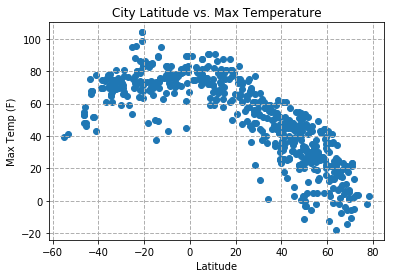

<Figure size 432x288 with 0 Axes>

In [36]:
plt.scatter(weather_pd["Lat"], weather_pd["Max Temp"])
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid(True, lw = 1, ls = '--')
plt.show()
plt.savefig('mtemp.png')

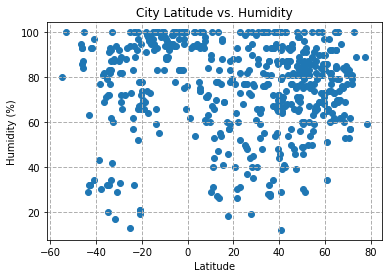

<Figure size 432x288 with 0 Axes>

In [37]:
plt.scatter(weather_pd["Lat"], weather_pd["Humidity"])
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True, lw = 1, ls = '--')
plt.show()
plt.savefig('hum.png')

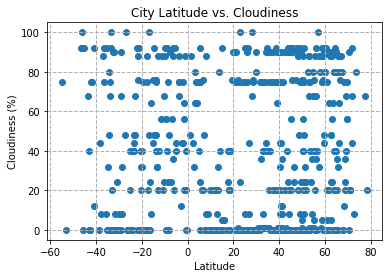

<Figure size 432x288 with 0 Axes>

In [38]:
plt.scatter(weather_pd["Lat"], weather_pd["Cloudiness"])
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True, lw = 1, ls = '--')
plt.show()
plt.savefig('cloud.png')

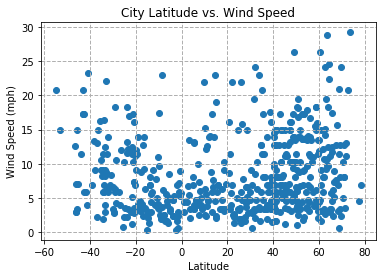

<Figure size 432x288 with 0 Axes>

In [39]:
plt.scatter(weather_pd["Lat"], weather_pd["Wind Speed"])
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True, lw = 1, ls = '--')
plt.show()
plt.savefig('cloud.png')